### Logistic Regression

### Importing the dataset

In [8]:
import pandas as pd

dataset = pd.read_csv(r"C:\Users\Aki\Downloads\cleaned_college_tier_dataset.csv")
dataset.head(10)

,Gender,10percentage,12graduation,12percentage,CollegeID,CollegeTier,collegeGPA,CollegeCityID,CollegeCityTier,GraduationYear,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,0,87.80,2009,84.00,6920,1,73.82,6920,1,2013,...,-1,-1,-1,-1,-1,-0.1590,0.3789,1.2396,0.14590,0.2889
1,1,57.00,2010,64.50,6624,2,65.00,6624,0,2014,...,-1,-1,-1,-1,-1,1.1336,0.0459,1.2396,0.52620,-0.2859
2,1,77.33,2007,85.17,9084,2,61.94,9084,0,2011,...,-1,-1,-1,260,-1,0.5100,-0.1232,1.5428,-0.29020,-0.2875
3,1,84.30,2009,86.00,8195,1,80.40,8195,1,2013,...,-1,-1,-1,-1,-1,-0.4463,0.2124,0.3174,0.27270,0.4805
4,0,82.00,2008,75.00,4889,2,64.30,4889,1,2012,...,-1,-1,-1,-1,-1,-1.4992,-0.7473,-1.0697,0.06223,0.1864
5,0,83.16,2007,77.00,10950,1,99.93,10950,0,2013,...,-1,-1,-1,313,-1,0.8463,-0.6201,-0.7585,-0.99500,-0.2859
6,0,72.50,2007,53.20,14381,2,68.00,14381,1,2013,...,-1,469,-1,-1,-1,0.1282,-0.4536,0.3174,0.90660,-0.0943
7,0,77.00,2009,88.00,13208,2,71.00,13208,1,2013,...,-1,-1,-1,-1,-1,0.1282,0.5454,0.4711,0.90660,-0.2859
8,1,76.80,2010,87.70,5338,2,73.15,5338,0,2014,...,438,-1,-1,-1,-1,-0.1590,-0.4536,0.1637,0.52620,-0.0943
9,0,57.00,2009,73.00,8346,2,70.08,8346,0,2014,...,407,-1,-1,-1,-1,-0.7335,-0.4536,-0.2974,1.41360,0.6721


### Dataset Information

In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2998 entries, 0 to 2997
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Gender                 2998 non-null   int64  
 1   10percentage           2998 non-null   float64
 2   12graduation           2998 non-null   int64  
 3   12percentage           2998 non-null   float64
 4   CollegeID              2998 non-null   int64  
 5   CollegeTier            2998 non-null   int64  
 6   collegeGPA             2998 non-null   float64
 7   CollegeCityID          2998 non-null   int64  
 8   CollegeCityTier        2998 non-null   int64  
 9   GraduationYear         2998 non-null   int64  
 10  English                2998 non-null   int64  
 11  Logical                2998 non-null   int64  
 12  Quant                  2998 non-null   int64  
 13  Domain                 2998 non-null   float64
 14  ComputerProgramming    2998 non-null   int64  
 15  Elec

### Getting the inputs and output

In [10]:
X = dataset.drop(columns=['CollegeTier']).values
y = dataset['CollegeTier'].values

X
y

array([1, 2, 2, ..., 2, 2, 2], shape=(2998,))

### Creating the Training Set and the Test Set

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.2, random_state = 0
)

X_train
X_test
y_train
y_test

array([2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

### Feature Scaling

In [12]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

X_train

array([[ 0.54103824,  0.19114841,  1.77404221, ...,  0.49042788,
         1.30082791,  0.61271313],
       [ 0.54103824,  1.07289293, -0.05386665, ..., -0.66007349,
         1.81390533, -0.1601173 ],
       [ 0.54103824,  1.03281364, -1.88177551, ...,  1.45025451,
        -0.83408058,  0.80551822],
       ...,
       [ 0.54103824, -0.55833443,  0.5554363 , ..., -0.14945654,
         0.1706172 , -0.15850723],
       [ 0.54103824, -2.12343096, -1.27247256, ..., -1.7491676 ,
         0.5473541 , -0.92982823],
       [ 0.54103824, -0.19862275, -2.49107846, ..., -0.05578446,
         0.32971251,  0.15776959]], shape=(2398, 25))

### Building the model

In [13]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(random_state = 0, max_iter=5000)

### Training the model

In [14]:
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,0
,solver,'lbfgs'
,max_iter,5000
,multi_class,'deprecated'


### Making the predictions on the test set

In [15]:
y_pred = model.predict(X_test)
y_pred

array([2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

### Confusion Matrix

In [16]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred)

array([[  4,  42],
       [  4, 550]])

### Accuracy

In [17]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.9233333333333333

### Classification Report

In [18]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.50      0.09      0.15        46
           2       0.93      0.99      0.96       554

    accuracy                           0.92       600
   macro avg       0.71      0.54      0.55       600
weighted avg       0.90      0.92      0.90       600



###Visualization

###Confusion Matrix Visualization (Heatmap)

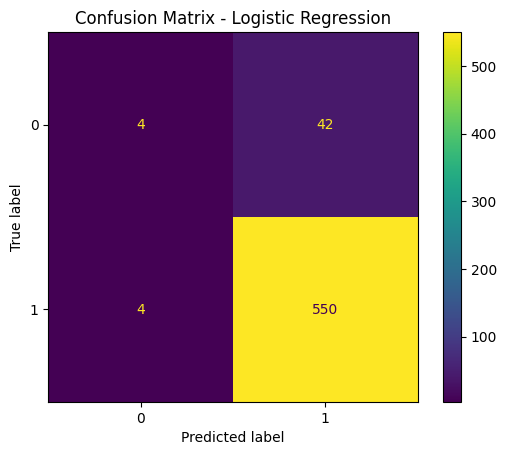

In [22]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

plt.title("Confusion Matrix - Logistic Regression")
plt.show()


###ROC Curve

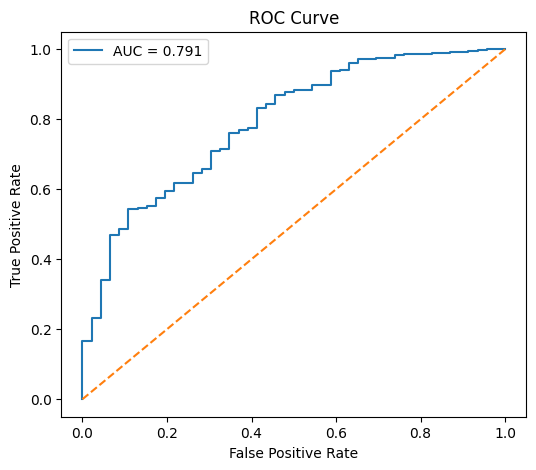

In [23]:
from sklearn.metrics import roc_curve, auc

y_test_binary = (y_test == 2).astype(int)
y_pred_prob = model.predict_proba(X_test)[:,1]

fpr, tpr, thresholds = roc_curve(y_test_binary, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.3f}")
plt.plot([0,1], [0,1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()